In [ ]:
import pandas as pd
data=pd.read_csv("agricultural_yield.csv")
df=pd.DataFrame(data)
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
print(df.columns)

Index(['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare',
       'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule',
       'Yield_kg_per_hectare'],
      dtype='object')


In [ ]:
X=df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare','Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule']]
y=df['Yield_kg_per_hectare'].values

In [ ]:
X.shape[1]

6

In [13]:
model=Sequential([
    Dense(256,activation="relu",input_shape=(X.shape[1],)),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
scalar=StandardScaler()
x_train=scalar

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['mse'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,057 (176.00 KB)

 Trainable params: 45,057 (176.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(x_train,y_train,batch_size=16,epochs=50)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: -10742.7168 - mse: 399179.4688
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -11344.1602 - mse: 376240.8125
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -11276.0352 - mse: 371262.2812
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -11327.2061 - mse: 374788.7812
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -11342.7793 - mse: 374231.0938
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: -11246.7188 - mse: 368010.6875
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: -11296.9180 - mse: 370465.3438
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: -11356.5723 - mse: 376903.6562
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: -11303.2520 - mse: 371787.6562
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: -11255.4121 - mse: 369691.4062
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: -11311.3027 - mse: 372279.5

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: -11269.0039 - mse: 370074.7500 - val_loss: -11264.8809 - val_mse: 370268.7500
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -11323.2314 - mse: 372228.7500 - val_loss: -11264.8809 - val_mse: 370268.7500
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -11397.1465 - mse: 378477.7812 - val_loss: -11264.8809 - val_mse: 370268.7500
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -11231.3613 - mse: 366213.8438 - val_loss: -11264.8809 - val_mse: 370268.7500
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -11304.7197 - mse: 372321.5000 - val_loss: -11264.8809 - val_mse: 370268.7500
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -11323.3906 - mse: 374422.7188 - val_loss: -11264.8809 - val_mse: 370268.7500
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -11303.4814 - mse: 372065.6250 - val_loss: -11264.8809 - val_mse: 370268.7500
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━

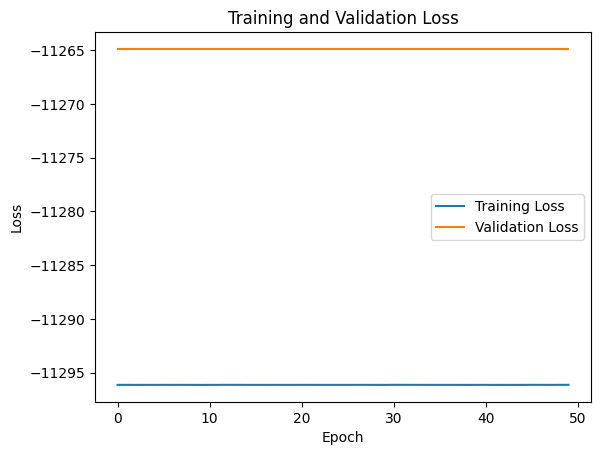

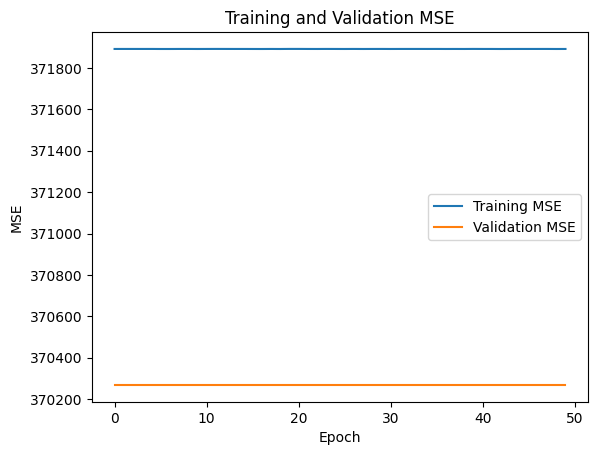

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


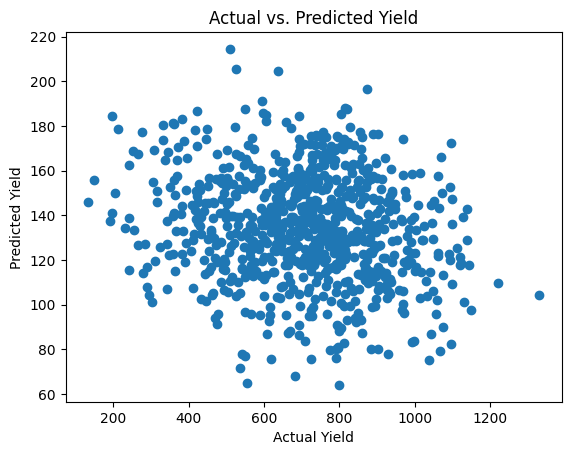

<ipython-input-21-47c2c2d32bd8>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-21-47c2c2d32bd8>:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


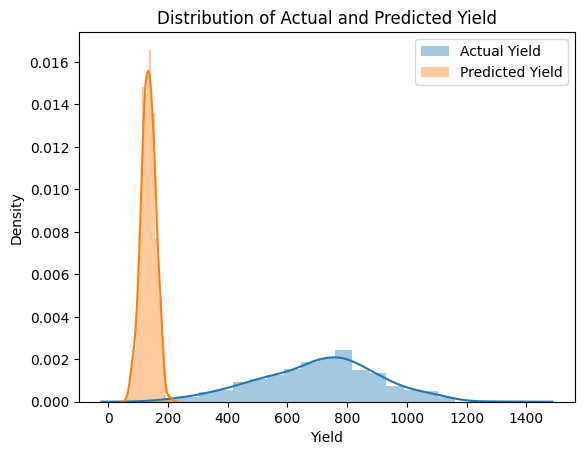

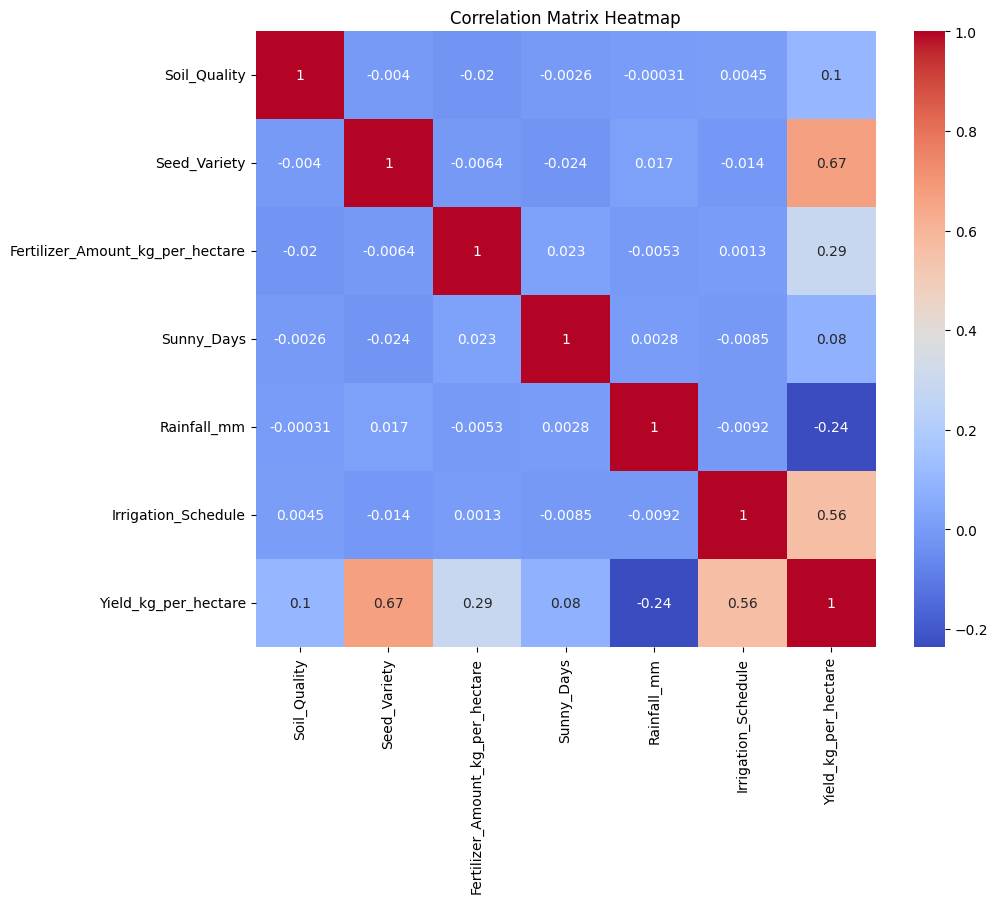

In [21]:
# prompt: generate different plots

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'x_train', 'y_train', 'x_test', 'y_test' are defined from the previous code

# Plot training history
history = model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test)) #added validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') # Plot validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#Plot training history of mean squared error
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE') # Plot validation loss
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()
plt.show()


# Scatter plot of actual vs. predicted values
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs. Predicted Yield")
plt.show()


# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

# Correlation Matrix Heatmap (if you want to visualize feature correlations)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()